This is a notebook for the phase 2 project where I will be cleaning and wrangling the data for this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Arsh/Documents/GitHub/dsc-phase-2-project-v2-3/data/kc_house_data.csv')

In [45]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2.0,4.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0,4.0,0.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2.0,3.0,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4.0,4.0,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2.0,5.0,0.0


In [4]:
df.shape

(21597, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
len(df['zipcode'].unique())

70

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

EDA of housing df. Looking at NaN values. Issue with yr_renovated column, dont know if column encodes information on houses that have not been renovated. Same for waterfront. Will not drop as we could potentially lose up to 6000 rows in our df, or over 1/4 of our data.

In [8]:
len(df['id'].unique())

21420

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df.to_csv('housing') # Saved csv as housing, have not made any changes, just did an initial inspection to see what needs to be cleaned.

I am going to convert all columns that are saved as objects into other data types, depending on the situation.

In [11]:
df.dropna(thresh=2, inplace=True)

In [12]:
df.shape

(21597, 21)

I guess there are no rows where there are 2 NaN values, interesting since we only have two columns with NaN values and none of them coincide.

In [13]:
df.dropna(subset=['view'], inplace = True)
df['date'] = pd.to_datetime(df['date'])
df['sqft_basement'] =  df["sqft_basement"].replace("?", np.NaN)
df.dropna(subset = ["sqft_basement"], inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [14]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ord_cat_selector = ['condition', 'grade', 'view']
cat_subset = df[ord_cat_selector]
cat_subset

,condition,grade,view
0,Average,7 Average,NONE
1,Average,7 Average,NONE
2,Average,6 Low Average,NONE
3,Very Good,7 Average,NONE
4,Average,8 Good,NONE
...,...,...,...
21592,Average,8 Good,NONE
21593,Average,8 Good,NONE
21594,Average,7 Average,NONE
21595,Average,8 Good,NONE


In [16]:
print(cat_subset['condition'].unique())
print(cat_subset['grade'].unique())
print(cat_subset['view'].unique())

['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [17]:
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
              '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']


In [18]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list, view_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '4 Low', '5 Fair', '6 Low Average',
                            '7 Average', '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion'],
                           ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])

In [19]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition,grade,view
0,2.0,4.0,0.0
1,2.0,4.0,0.0
2,2.0,3.0,0.0
3,4.0,4.0,0.0
4,2.0,5.0,0.0
...,...,...,...
21077,2.0,5.0,0.0
21078,2.0,5.0,0.0
21079,2.0,4.0,0.0
21080,2.0,5.0,0.0


In [20]:
df['cond_num'] = X_subset['condition']
df['grade_num'] = X_subset['grade']
df['view_num'] = X_subset['view']

In [21]:
df.to_csv('selected_csv')

In [22]:
#plt.figure(figsize = (20,20))
#sns.heatmap(df.corr().abs(), annot = True)

In [23]:
#plt.figure(figsize = (20,20))
#sns.pairplot(df, corner = True)

This is where we left off on Friday. I will continue doing data wrangling, in my own way, on this notebook. Importasnt to note that we created pairplots and heatmaps using te df from info derived above. However, it did not revela any apparent relationships. So more data cleaning is required.

In [24]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
cond_num                float64
grade_num               float64
view_num                float64
dtype: object

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num'],
      dtype='object')

In [26]:
df2 = df

In [27]:
def data_clean(price, df2):
    Q1 = df2['price'].quantile(.25)
    Q3 = df2['price'].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2['price'] <= out_top]
    df2 = df2[df2['price'] >= out_bottom]
    return df2

In [28]:
df2 = data_clean('price', df2)

In [29]:
df.shape

(21082, 24)

In [30]:
df2.shape

(19467, 24)

In [31]:
df2.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
cond_num                float64
grade_num               float64
view_num                float64
dtype: object

In [32]:
df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,cond_num,grade_num,view_num
id,1.000000,0.020770,0.013095,0.030860,0.014291,-0.133717,0.033711,0.017628,-0.004316,0.028568,-0.014828,-0.009077,0.001480,0.022905,0.015620,-0.143590,0.010698,0.006083,-0.002513
price,0.020770,1.000000,0.282419,0.432302,0.597255,0.093195,0.264687,0.507684,0.220630,0.062129,0.076832,-0.018683,0.445846,0.085149,0.543874,0.084732,-0.001900,0.007489,-0.004219
bedrooms,0.013095,0.282419,1.000000,0.484770,0.585467,0.023604,0.150579,0.461506,0.279586,0.163432,-0.004989,-0.148753,-0.037505,0.141828,0.366045,0.020495,0.011101,0.004185,-0.011085
bathrooms,0.030860,0.432302,0.484770,1.000000,0.707985,0.059820,0.502192,0.629025,0.213881,0.556155,0.014568,-0.212303,-0.020419,0.252491,0.519011,0.061953,-0.028122,0.037102,-0.013631
sqft_living,0.014291,0.597255,0.585467,0.707985,1.000000,0.155678,0.332577,0.848038,0.372894,0.359790,0.011484,-0.210405,-0.004512,0.293055,0.729918,0.171394,-0.006139,0.022325,-0.005281
sqft_lot,-0.133717,0.093195,0.023604,0.059820,0.155678,1.000000,-0.020474,0.157669,0.013143,0.038855,0.008988,-0.129980,-0.095496,0.221388,0.142489,0.713246,0.006020,-0.012041,0.003257
floors,0.033711,0.264687,0.150579,0.502192,0.332577,-0.020474,1.000000,0.526450,-0.303930,0.517874,-0.009788,-0.066978,0.030515,0.138444,0.265442,-0.024168,-0.049377,0.046371,-0.018221
sqft_above,0.017628,0.507684,0.461506,0.629025,0.848038,0.157669,0.526450,1.000000,-0.175484,0.468113,-0.008511,-0.276342,-0.060272,0.396311,0.710285,0.173098,-0.014557,0.029120,-0.001932
sqft_basement,-0.004316,0.220630,0.279586,0.213881,0.372894,0.013143,-0.303930,-0.175484,1.000000,-0.151233,0.036119,0.092974,0.097149,-0.149489,0.112347,0.015325,0.013884,-0.009273,-0.006383
yr_built,0.028568,0.062129,0.163432,0.556155,0.359790,0.038855,0.517874,0.468113,-0.151233,1.000000,-0.213976,-0.343167,-0.157952,0.407423,0.369741,0.059047,-0.065386,0.064709,-0.014039


<AxesSubplot:>

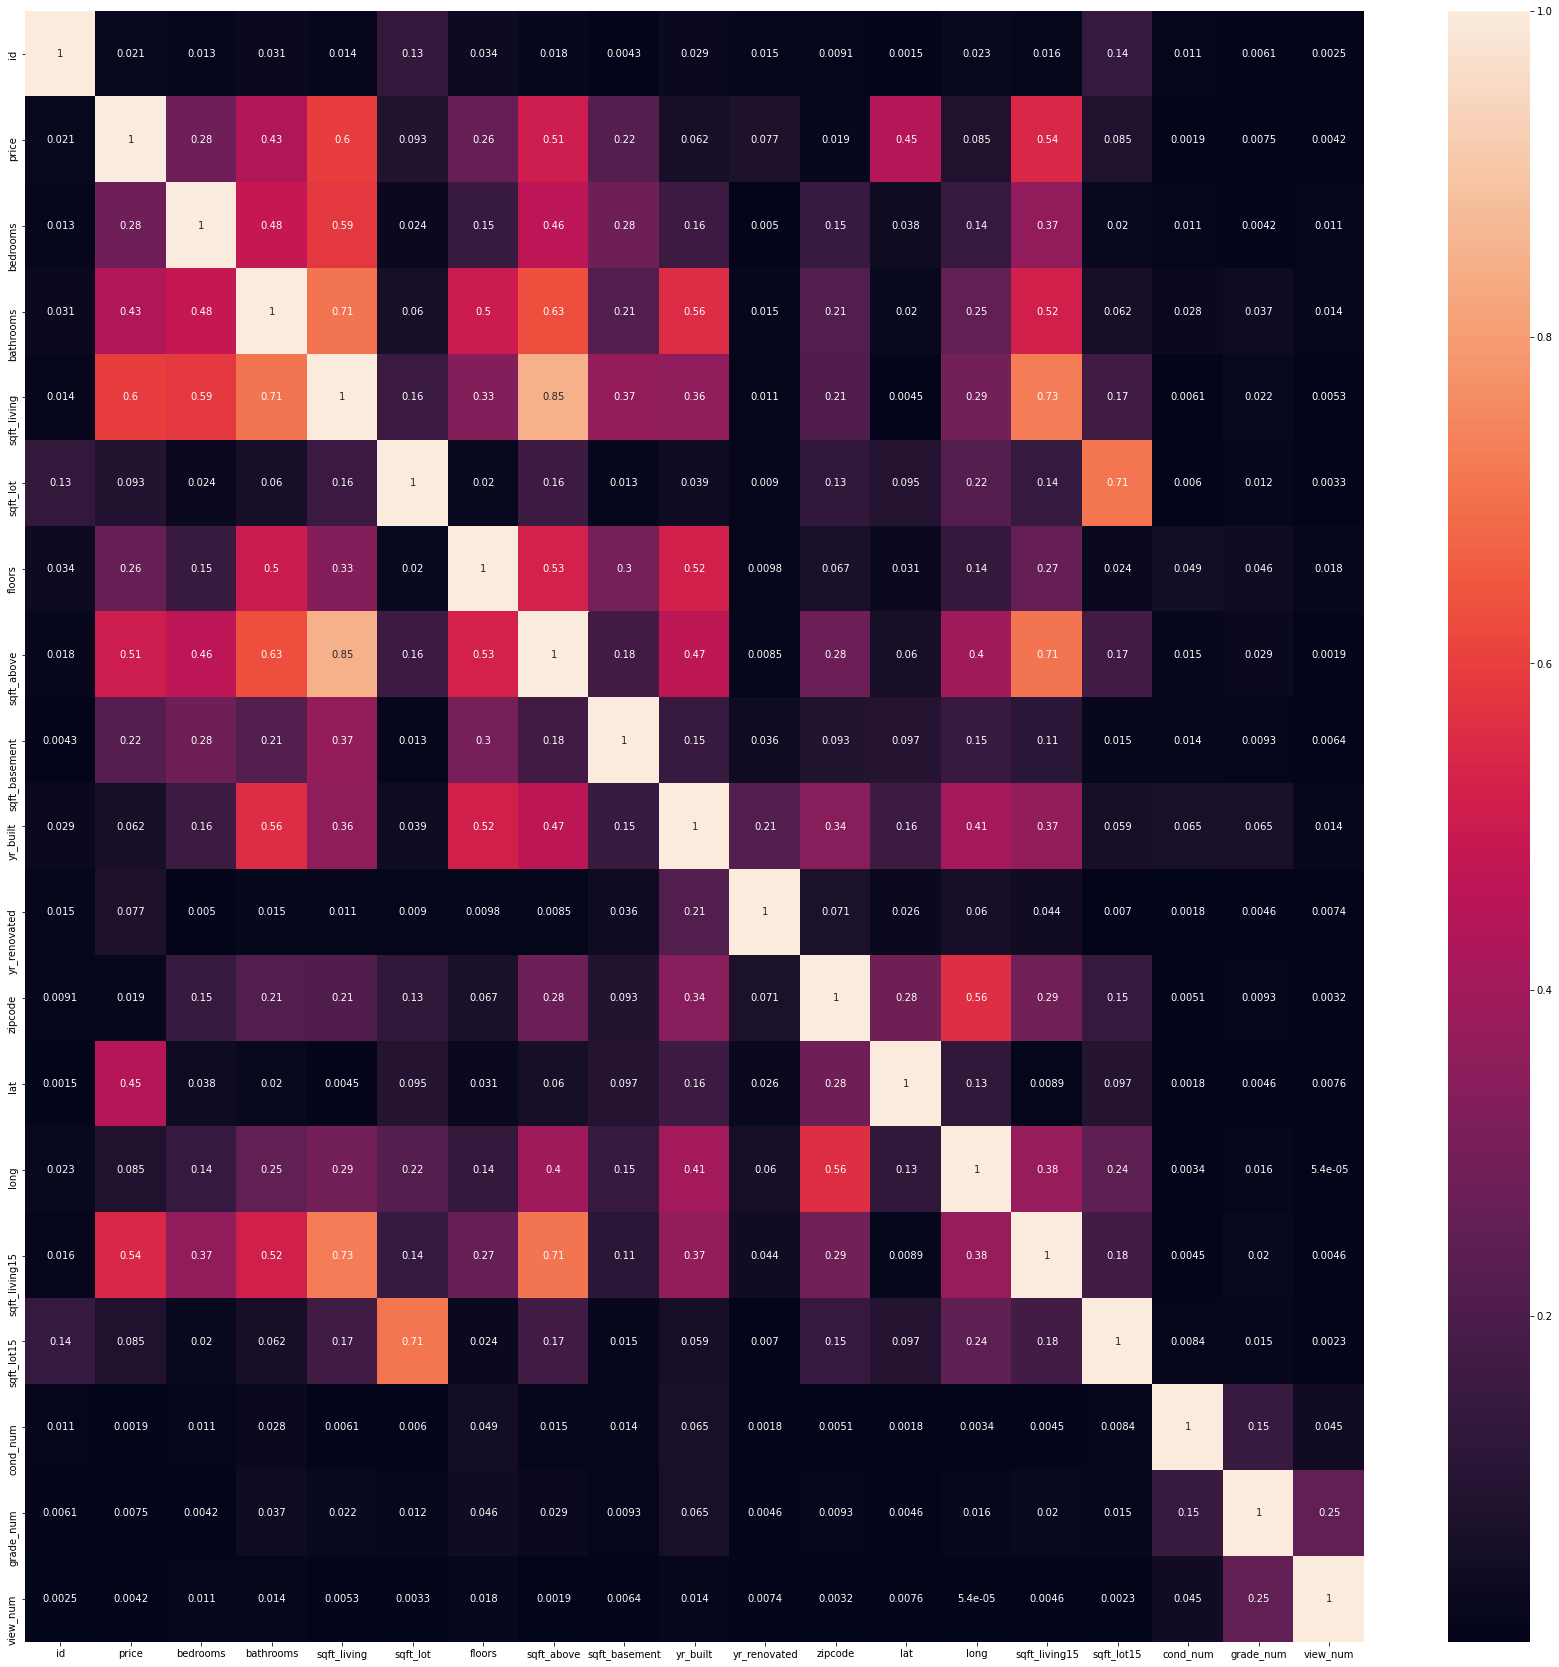

In [33]:
plt.figure(figsize = (30,30))
sns.heatmap(df2.corr().abs(), annot = True)

As these heatmaps show, perhaps there isn't a strong correlation between price and most of these variables. Perhaps if outliers are removed, using the function created by Musa, we will see more clearer relationships.

In [34]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num',
       'view_num'],
      dtype='object')

In [35]:
df2 = data_clean('cond_num', df2)
df2.shape

(18744, 24)

In [36]:
df2 = data_clean('bedrooms', df2)
df2.shape

(18389, 24)

In [37]:
df2 = data_clean('bathrooms', df2)
df2.shape

(18220, 24)

In [38]:
df2 = data_clean('sqft_living', df2)
df2.shape

(18101, 24)

In [39]:
df2 = data_clean('sqft_living15', df2)
df2.shape

(18101, 24)

<AxesSubplot:>

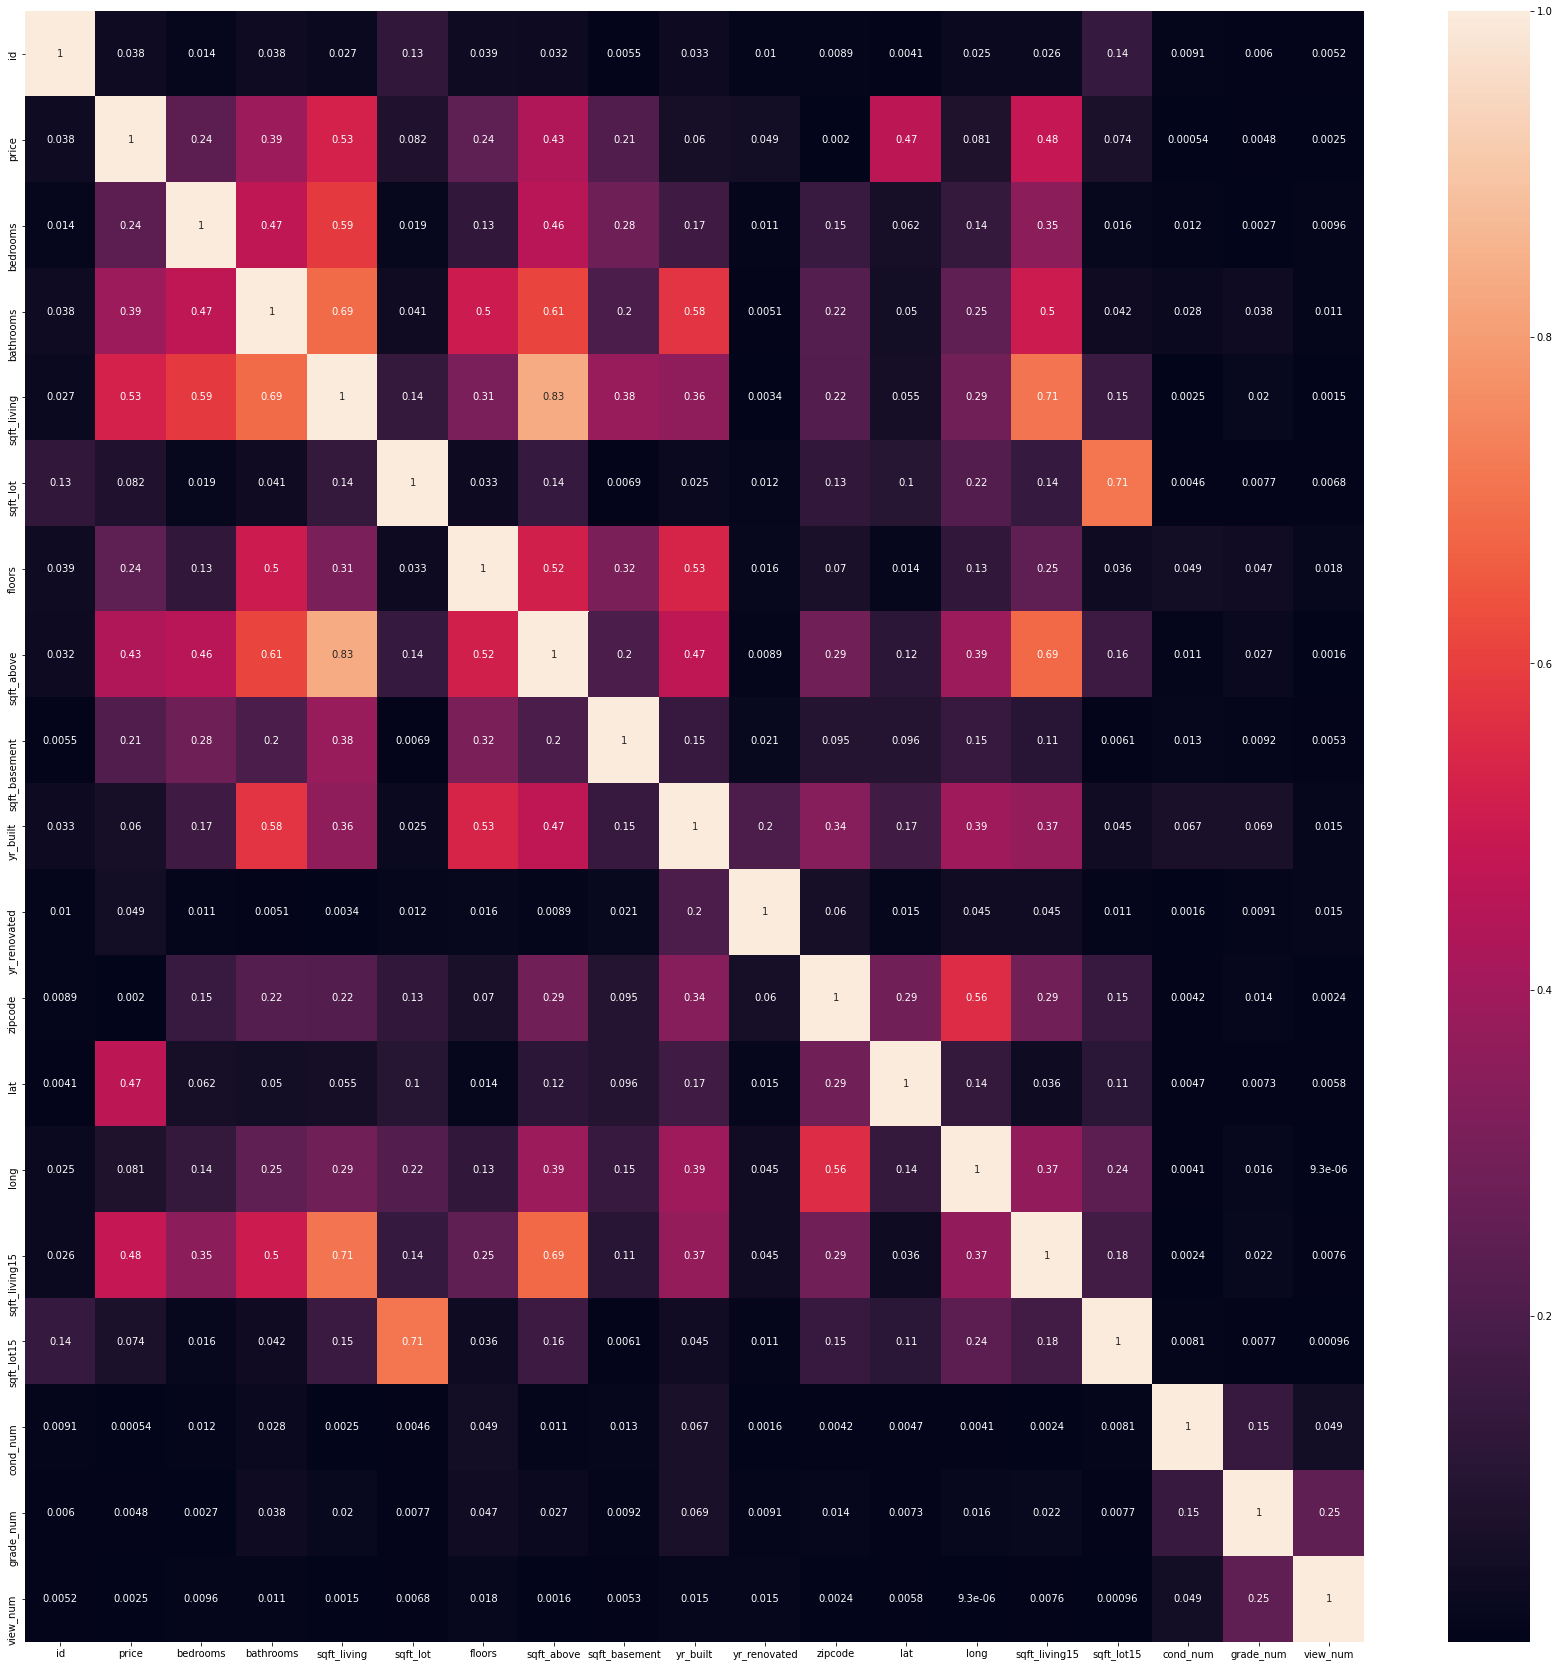

In [40]:
plt.figure(figsize = (30,30))
sns.heatmap(df2.corr().abs(), annot = True)

The more outliers that are removed from the df, the weaker the correlations are between price and other variables.

In [41]:
df2.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98146, 98038, 98007, 98115,
       98107, 98126, 98019, 98103, 98003, 98133, 98092, 98030, 98002,
       98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98119,
       98023, 98148, 98042, 98059, 98122, 98144, 98034, 98008, 98116,
       98118, 98032, 98045, 98077, 98198, 98108, 98168, 98177, 98029,
       98006, 98022, 98155, 98024, 98105, 98075, 98011, 98053, 98031,
       98010, 98106, 98070, 98199, 98072, 98188, 98065, 98102, 98005,
       98014, 98033, 98055, 98004, 98040, 98109, 98039])

Maybe we should remove houses that are in Kings County, but not in the immediate Seattle area. This would remove smaller and more rural communitites that create noise in the data.

In [42]:
values = [98077, 98019, 98224, 98024, 98288, 98065, 98045, 98022, 98092, 98042, 98010, 98051, 98038, 98058, 98027, 98059, 98029, 98014, 98053]
df3 = df[df.zipcode.isin(values) == False]
print(df.shape)
print(df3.shape)


(21082, 24)
(16206, 24)


<AxesSubplot:>

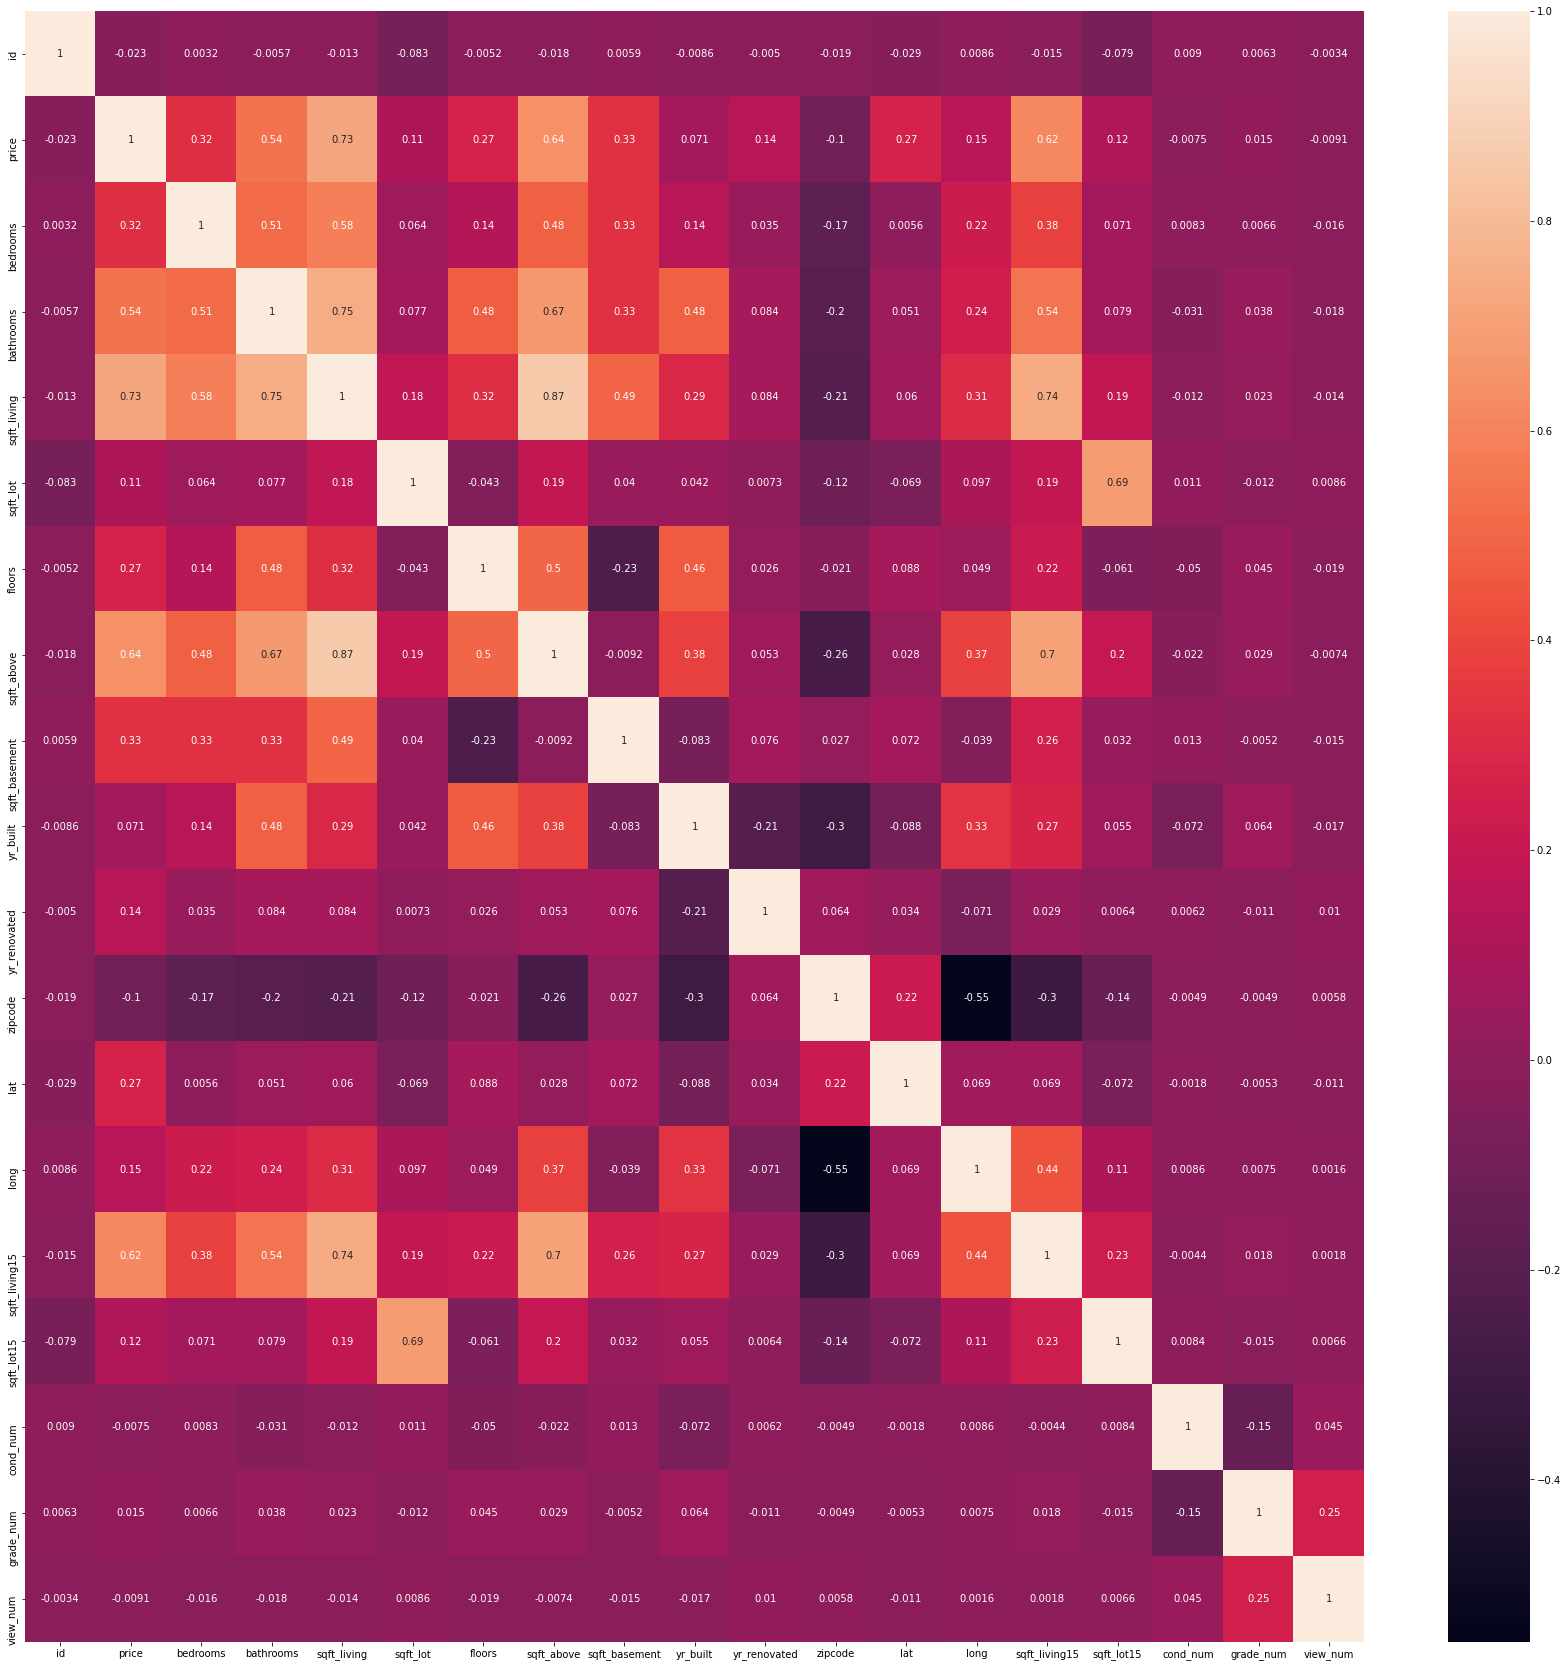

In [43]:
plt.figure(figsize = (30,30))
sns.heatmap(df3.corr(), annot = True)

This looks far brighter than the heatmap shown earlier. Positive sign so far, but what would happen if I removed outliers?

(14940, 24)


<AxesSubplot:>

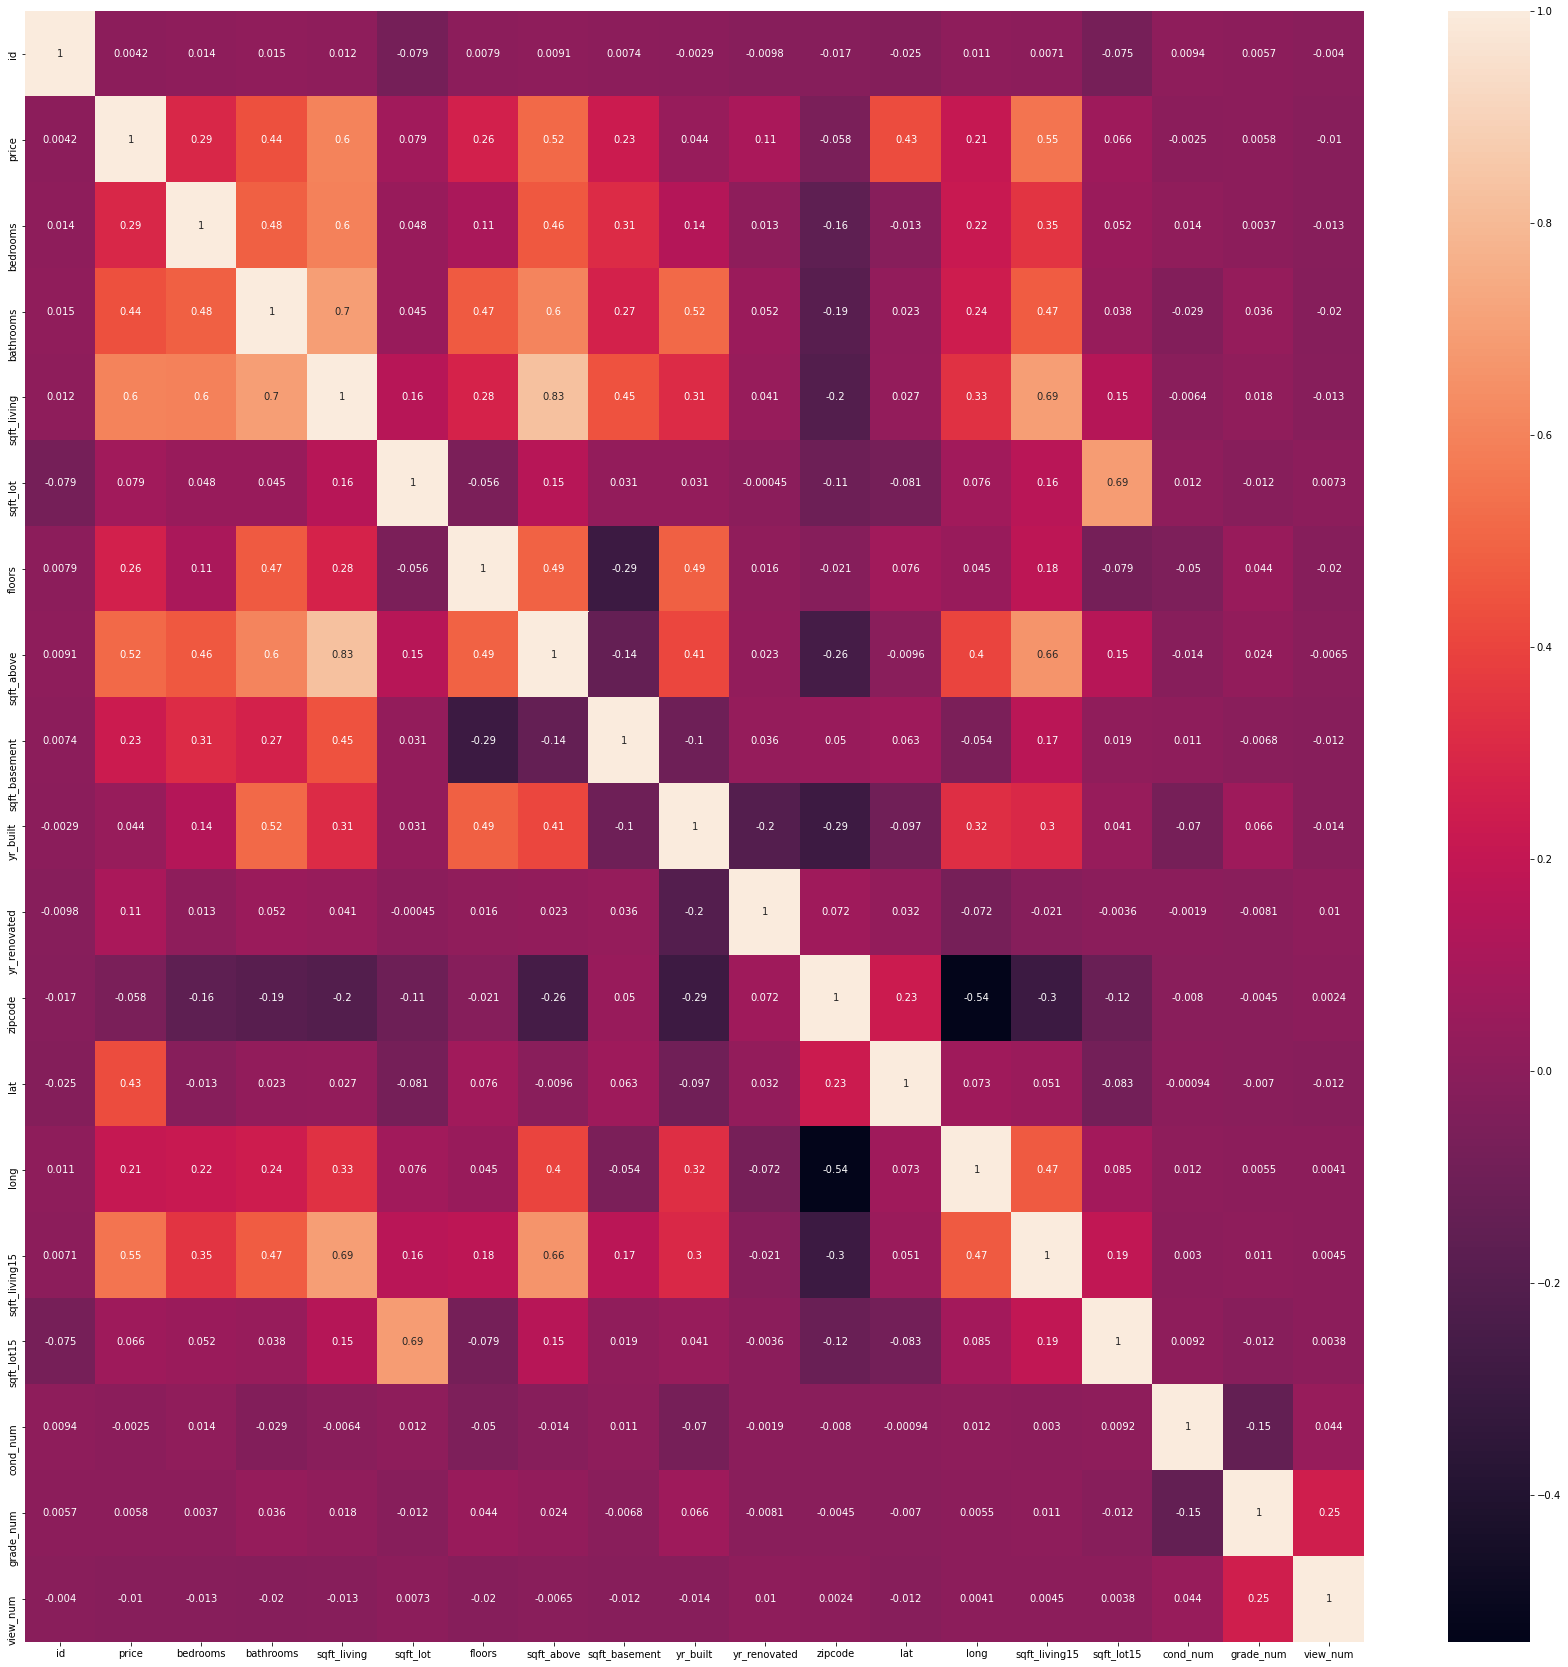

In [44]:
df2 = data_clean('price', df3)
print(df2.shape)
plt.figure(figsize = (30,30))
sns.heatmap(df2.corr(), annot = True)

This is the heatmap created after outliers are removed. Very similar to the previous one, but has weaker correlations after outliers are removed.